# MAP 2 
## Gradient Vector applications

In [ ]:
## Imports
import math
import numpy as np
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib.function_base import meshgrid
from google.colab import files
from matplotlib import colors
from mpl_toolkits import mplot3d
from sympy import symbols, diff

## Question 1
### Graph functions

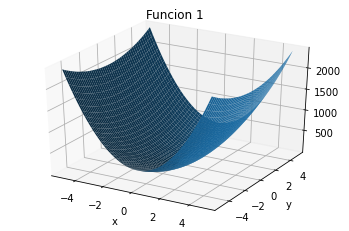

In [ ]:
# Funcion 1

# Returns the function evaluated with given points
def function1_z(x, y):
  return np.sin(x*y)+(81*x**2)+(16*y**2)

# Graphs the function
N = 50
xValues = np.linspace(-5, 5, N)
yValues = np.linspace(-5, 5, N)

X, Y = np.meshgrid(xValues, yValues)
Z = function1_z(X, Y)

ax = plt.axes(projection='3d')
plt.xlabel('x') 
plt.ylabel('y')
plt.title("Function 1")
ax.plot_surface(X, Y, Z);

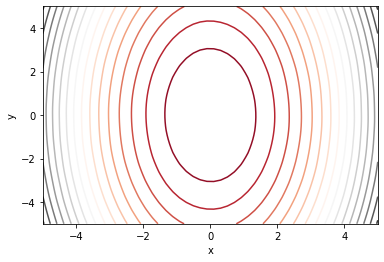

In [ ]:
## Contour Map
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = function1_z(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.contour(X, Y, Z, 20, cmap='RdGy');

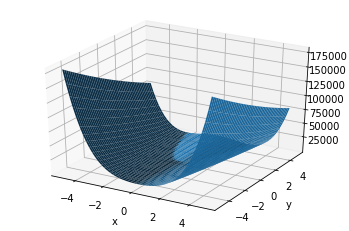

In [ ]:
#Funcion 2
def function2_z(x, y):
  return (2-x)**2+200*(y-x**2)**2

N = 50
xValues = np.linspace(-5, 5, N)
yValues = np.linspace(-5, 5, N)

X, Y = np.meshgrid(xValues, yValues)
Z = function2_z(X, Y)
ax = plt.axes(projection='3d')

plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z);

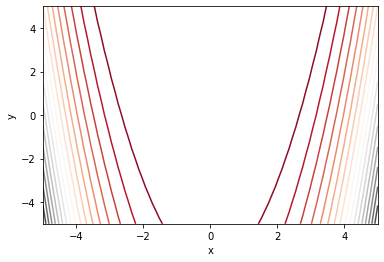

In [ ]:
# Contour map
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y)
Z = function2_z(X, Y)

plt.xlabel('x')
plt.ylabel('y')
plt.contour(X, Y, Z, 20, cmap='RdGy');

## Question 2
### Algorithm

In [ ]:
# Funciones que devuelven el gradiente por componente

def function1_dx(x1, y1):
  x, y = symbols('x, y', real=True)
  f = smp.sin(x*y)+(81*x**2)+(16*y**2)
  dfdx = smp.diff(f, x)
  return dfdx.subs([(x, x1), (y, y1)]).evalf()

def function1_dy(x1, y1):
  x, y = symbols('x, y', real=True)
  f = smp.sin(x*y)+(81*x**2)+(16*y**2)
  dfdy = smp.diff(f, y)
  return dfdy.subs([(x, x1), (y, y1)]).evalf()

def function2_dx(x1, y1):
  x, y = symbols('x, y', real=True)
  f = (2-x)**2+200*(y-x**2)**2
  dfdx = smp.diff(f, x)
  return dfdx.subs([(x, x1), (y, y1)]).evalf()

def function2_dy(x1, y1):
  x, y = symbols('x, y', real=True)
  f = (2-x)**2+200*(y-x**2)**2
  dfdx = smp.diff(f, y)
  return dfdx.subs([(x, x1), (y, y1)]).evalf()

In [ ]:
# Algorithm with constant learning rate or step size 

def gradient_descent_f1(step):
  #Tolerance
  tolerance = 10**(-10)
  #initial points
  x = 1.10
  y = 1.10

  #Dataframe to import algorithm data
  column_names = ["k", "X", "Y", "P_x", "P_y", "magnitude"]
  df = pd.DataFrame(columns=column_names)

  for k in range(1000):
    
    dx = function1_dx(x, y)
    dy = function1_dy(x, y)

    x = x-step*dx
    y = y-step*dy

    array = np.array([dx, dy], dtype=np.float64)

    #Add info to dataframe
    df = df.append({'k': k, 'X': x, 'Y': y, 'P_x': dx, 'P_y': dy, 'magnitude': np.linalg.norm(array)}, 
                   ignore_index=True)

    if np.linalg.norm(array) < tolerance:
      break

  return df

def gradient_descent_f2(step):
  #Error aceptado
  tolerance = 10**(-10)
  #Puntos iniciales
  x = 1.10
  y = 1.10

  #Inicializar dataframe para imprimir tabla
  column_names = ["k", "X", "Y", "P_x", "P_y", "magnitud"]
  df = pd.DataFrame(columns=column_names)

  for k in range(1000):
    
    dx = function2_dx(x, y)
    dy = function2_dy(x, y)

    x = x-step*dx
    y = y-step*dy

    array = np.array([dx, dy], dtype=np.float64)

    #Add info to dataframe
    df = df.append({'k': k, 'X': x, 'Y': y, 'P_x': dx, 'P_y': dy, 'magnitud': np.linalg.norm(array)}, 
                   ignore_index=True)


    if np.linalg.norm(array) < tolerance:
      break

  return df

In [ ]:
# Algoritmo con learning rate o step size variable

def gradient_descent_f1_v():
  #Error aceptado
  tolerance = 10**(-10)
  #Puntos iniciales
  x = 1.10
  y = 1.10

  #Inicializar dataframe para imprimir tabla
  column_names = ["k", "X", "Y", "P_x", "P_y", "magnitud"]
  df = pd.DataFrame(columns=column_names)

  for k in range(1000):
    
    if k==0:
      step = 1
    else:
      step = 1/(2*k)
    
    dx = function1_dx(x, y)
    dy = function1_dy(x, y)

    x = x-step*dx
    y = y-step*dy

    array = np.array([dx, dy], dtype=np.float64)

    #Add info to dataframe
    df = df.append({'k': k, 'X': x, 'Y': y, 'P_x': dx, 'P_y': dy, 'magnitud': np.linalg.norm(array)}, 
                   ignore_index=True)


    if np.linalg.norm(array) < tolerance:
      break

  return df

def gradient_descent_f2_v():
  #Error aceptado
  tolerance = 10**(-10)
  #Puntos iniciales
  x = 1.10
  y = 1.10

  #Inicializar dataframe para imprimir tabla
  column_names = ["k", "X", "Y", "P_x", "P_y", "magnitud"]
  df = pd.DataFrame(columns=column_names)

  for k in range(1000):

    if k==0:
      step = 1
    else:
      step = 1/(2*k)
    
    dx = function2_dx(x, y)
    dy = function2_dy(x, y)

    x = x-step*dx
    y = y-step*dy

    array = np.array([dx, dy], dtype=np.float64)

    #Add info to dataframe
    df = df.append({'k': k, 'X': x, 'Y': y, 'P_x': dx, 'P_y': dy, 'magnitud': np.linalg.norm(array)}, 
                   ignore_index=True)


    if np.linalg.norm(array) < tolerance:
      break

  return df

In [ ]:
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
gradient_descent_f1(0.01)


,k,X,Y,P_x,P_y,magnitud
0,0,-0.685883213413413,0.744116786586587,178.588321341341,35.5883213413413,1.820997e+02
1,1,0.418754724659240,0.511984159495825,-110.463793807265,23.2132627090762,1.128765e+02
2,2,-0.264630552742276,0.344057554587940,68.3385277401516,16.7926604907885,7.037150e+01
3,3,0.160644618085078,0.236594481598321,-42.5275170827355,10.7463072989619,4.386425e+01
4,4,-0.101963899336222,0.159278961486304,26.2608517421300,7.73155201120173,2.737534e+01
...,...,...,...,...,...,...
65,65,-5.32241639489979e-14,9.77942093904138e-12,-9.28554611520104e-12,4.59993221212093e-10,4.600869e-10
66,66,-6.47952277420351e-14,6.65053848018763e-12,1.15710637930372e-12,3.12888245885375e-10,3.128904e-10
67,67,-2.63323436018145e-14,4.52301411880501e-12,-3.84628841402206e-12,2.12752436138262e-10,2.127872e-10
68,68,-2.89040881549251e-14,3.07591292422342e-12,2.57174455311054e-13,1.44710119458158e-10,1.447103e-10


In [ ]:
# Download pandas dataframe to computer as csv
dataFrame = gradient_descent_f2_v()
dataFrame.to_csv('f2_v.csv', encoding= 'utf-8-sig')
files.download('f2_v.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>